# __Fire Causes__
#### _Bureau of Fire Investigations_
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Emblem_of_the_New_York_City_Fire_Department.svg" width="120"/>
</div>

<hr>

Source: _<a href="https://data.cityofnewyork.us/Public-Safety/Bureau-of-Fire-Investigations-Fire-Causes/ii3r-svjz/about_data">NYC Open Data</a>_ <br>
Last updated: _9 May 2024_ <br>
Accessed: _3 June 2024_

<hr>

## __%%% DRAFT %%% Table of Contents__
1. [Preparing the dataset for the analysis](#Preparing-the-dataset-for-the-analysis)<br>
    1.1 [Importing the necessary libraries](#Importing-the-necessary-libraries)
2. [Analyzing / plotting data](#Analyzing-/-plotting-data)

# __Preparing the dataset for the analysis__
* Importing
* Getting to know the dataset
* Transforming and cleaning

## __Importing the necessary libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import sys
import os

sys.path.append(r'C:\Users\vanli\# Python Tutorials\10. Practice\helper_functions')

from helper_functions import scrollable_output, dataset_check, uvalues_check, text_check

In [3]:
scrollable_output(output_height = 500)
pd.set_option('display.max_columns', None)

## __Getting to know the dataset__

In [4]:
# Set the path to the file
path = 'datasets/001. Bureau of Fire Investigations - Fire Causes/Bureau_of_Fire_Investigations_-_Fire_Causes_20240603.csv'

In [5]:
df = pd.read_csv(path)
df.head()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [6]:
# Set the new column names
colnames = ['Year', 'ID', 'Incident time', 'Borough', 'Fire battalion', 'Community district', 
            'Police precinct', 'Incident type', 'Fire cause', 'Fire cause category']

In [7]:
# Set the new column names
df = pd.read_csv(path, names = colnames, header = 0)
df.head()

,Year,ID,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [8]:
# Perform the basic check
dataset_check(
    df, 
    shape_check = True,
    dup_check = True,
    dtypes_check = True,
    missing_values_check = True,
    unique_values_check = True,
    stats_check = False,
    corr_check = False
)

COLUMNS:
10

ROWS:
53 741

DUPLICATE ROWS:
0

DATATYPES:
Year                    int64
ID                      int64
Incident time          object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object

MISSING VALUES:
Borough                 260
Fire battalion         7658
Community district      338
Police precinct         344
Incident type           827
Fire cause               73
Fire cause category      61
dtype: int64

MISSING VALUES IN %:
Borough                 0.48%
Fire battalion         14.25%
Community district      0.63%
Police precinct         0.64%
Incident type           1.54%
Fire cause              0.14%
Fire cause category     0.11%
dtype: object

UNIQUE VALUES:
Year                       9
ID                      9543
Incident time          52343
Borough                    6
Fire battalion           

In [9]:
# Add unique_values_Percetnage_check for the category data
# unique_to_total_ratio = df['Column'].nunique() / len(df)
# print(unique_to_total_ratio)

In [10]:
# example calculation###
# round((df.nunique() / len(df))*100, 2)

## __Early findings__

Let’s check what we have:
- <b>Duplicates.</b> There are no duplicate rows.
- <b>Datatypes.</b> Columns <code>Incident time</code>, <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> are seen as <code>object</code> columns even though they contain dates or numbers. This should be investigated.
- <b>Missing values.</b> We have relatively many missing values in column <code>Incident type</code> and we have _a lot_ of missing values in <code>Fire battalion</code>. This is very strange — how come _so many_ incidents do not have an assigned battalion. Does this mean that some fires in the city were not reported/were not handled by the Fire Department? 
- <b>Unique values.</b> We have 53 741 rows, but the <code>ID</code> column has 9 543 unique values. That means that the column is of no use and can be dropped. Also, New York has 5 boroughs (see image below) and not 6. Also a point of interest.

<div>
<img src="https://www.loumovesyou.com/wp-content/uploads/2022/11/FiveBoroughs-01.jpg" width="500"/>
</div>

## __Unique values per column__

Let’s check what are the unique values per column.

In [11]:
def uvalues_check(dataset, columns):
    print('UNIQUE VALUES\n')
    for column in columns:
        print(column.upper())
        uvalues = dataset[column].unique()
        uvalues_sorted = sorted(uvalues, key = lambda x: str(x).lower())
        print(uvalues_sorted, '\n')

In [12]:
df.columns

Index(['Year', 'ID', 'Incident time', 'Borough', 'Fire battalion',
       'Community district', 'Police precinct', 'Incident type', 'Fire cause',
       'Fire cause category'],
      dtype='object')

In [13]:
uvalues_check(df, ['Year', 'Borough', 'Fire battalion', 'Community district',
                   'Police precinct', 'Incident type', 'Fire cause',
                   'Fire cause category'])

UNIQUE VALUES

YEAR
[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 

BOROUGH
['Bronx', 'Brooklyn', 'Manhattan', nan, 'Outside of NYC', 'Queens', 'Staten Island'] 

FIRE BATTALION
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '26', '27', '28', '3', '31', '32', '33', '35', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '57', '58', '6', '7', '8', '9', 'BC', 'CD', 'MR', nan, 'OP', 'SC', 'TR'] 

COMMUNITY DISTRICT
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9', nan, 'Out of NYC'] 

POLICE PRECINCT
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '12', '120', '121', '122', '123', '13', '14', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '28', '30', '32', '33', '34', '40', '41', '42', '43', '44', '45', '46'

Let’s also check columns <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> for textual values.

## __A deeper look at (potentially) numerical columns__

In [14]:
def text_check(dataset, columns):
    df = dataset
    print('NON-NUMERIC VALUES\n')
    for column in columns:
        numeric = pd.to_numeric(df[column], errors = 'coerce')
        text_values = df[column][numeric.isna() & df[column].notna()].unique()
        text_values_sorted = sorted(text_values, key = lambda x: x.lower())
        
        if len(text_values_sorted) > 0:
            print(column.upper())
            print(text_values_sorted, '\n')
        else:
            print(column.upper())
            print('Numeric values only\n')

In [15]:
text_check(df, ['Fire battalion', 'Community district', 'Police precinct'])

NON-NUMERIC VALUES

FIRE BATTALION
['BC', 'CD', 'MR', 'OP', 'SC', 'TR'] 

COMMUNITY DISTRICT
['Out of NYC'] 

POLICE PRECINCT
['5th', '7th', 'HWY2', 'HY2', 'mtn', 'MTS', 'NC05', 'NC08', 'NJ', 'PAPD', 'PSA2', 'PSA7', 'SC01', 'SC07'] 



The <code>ID</code> column can be surely dropped, but what about these textual values we’ve just found out? And what about <code>Outside of NYC</code> in column <code>Borough</code>? Let’s create some pivots to see if these values can be dropped. We can begin with the <code>Borough</code>.

In [16]:
nan_values = 'Unknown'
df['Borough'].fillna(nan_values, inplace = True)

pvt_borough = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Borough',
    aggfunc = 'count',
)

pvt_borough['Percentage'] = (pvt_borough['ID'] / pvt_borough['ID'].sum()) * 100
pvt_borough = pvt_borough.sort_values(by = ['Percentage'], ascending = False)

pvt_borough['Percentage'] = pvt_borough['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_borough.index = pvt_borough.index.to_series().replace({nan_values: np.nan})

pvt_borough.tail(50)

,ID,Percentage
Borough,,
Brooklyn,15823,29.44%
Bronx,12268,22.83%
Queens,12169,22.64%
Manhattan,10381,19.32%
Staten Island,2763,5.14%
NaN,260,0.48%
Outside of NYC,77,0.14%


There were 77 incidents <code>Outside of NYC</code> and 260 incidents with missing data. Since (a) the numbers are relatively small (0,52% in total) and (b) we will need borough-specific information for our further analysis, rows with these values will be dropped before we proceed.

In [17]:
df = df[df['Borough'].notna() & ~df['Borough'].isin(['Outside of NYC', 'Unknown'])]
df['Borough'].value_counts()

Brooklyn         15823
Bronx            12268
Queens           12169
Manhattan        10381
Staten Island     2763
Name: Borough, dtype: int64

This looks much better! Let’s continue with <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code>.
<br><br><code>Fire battalion</code>:

In [18]:
nan_values = 'Unknown'
df['Fire battalion'].fillna(nan_values, inplace = True)

pvt_firebat = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Fire battalion',
    aggfunc = 'count',
)

pvt_firebat['Percentage'] = (pvt_firebat['ID'] / pvt_firebat['ID'].sum()) * 100
pvt_firebat = pvt_firebat.sort_values(by = ['Percentage'], ascending = False)

pvt_firebat['Percentage'] = pvt_firebat['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_firebat.index = pvt_firebat.index.to_series().replace({nan_values: np.nan})

pvt_firebat

,ID,Percentage
Fire battalion,,
NaN,7431,13.91%
50,1667,3.12%
54,1500,2.81%
15,1432,2.68%
46,1410,2.64%
18,1356,2.54%
19,1349,2.53%
44,1305,2.44%
38,1226,2.30%


<code>Community district</code>:

In [19]:
nan_values = 'Unknown'
df['Community district'].fillna(nan_values, inplace = True)

pvt_comdist = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Community district',
    aggfunc = 'count',
)

pvt_comdist['Percentage'] = (pvt_comdist['ID'] / pvt_comdist['ID'].sum()) * 100
pvt_comdist = pvt_comdist.sort_values(by = ['Percentage'], ascending = False)

pvt_comdist['Percentage'] = pvt_comdist['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_comdist.index = pvt_comdist.index.to_series().replace({nan_values: np.nan})

pvt_comdist

,ID,Percentage
Community district,,
1,5700,10.67%
12,5129,9.60%
3,4861,9.10%
5,4640,8.69%
9,3505,6.56%
2,3435,6.43%
4,3393,6.35%
7,3228,6.04%
10,3166,5.93%


<code>Police precinct</code>:

In [20]:
nan_values = 'Unknown'
df['Police precinct'].fillna(nan_values, inplace = True)

pvt_precinct = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Police precinct',
    aggfunc = 'count',
)

pvt_precinct['Percentage'] = (pvt_precinct['ID'] / pvt_precinct['ID'].sum()) * 100
pvt_precinct = pvt_precinct.sort_values(by = ['Percentage'], ascending = False)

pvt_precinct['Percentage'] = pvt_precinct['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_precinct.index = pvt_precinct.index.to_series().replace({nan_values: np.nan})

pvt_precinct.tail(25)

,ID,Percentage
Police precinct,,
78,357,0.67%
30,356,0.67%
17,355,0.66%
26,355,0.66%
100,351,0.66%
76,348,0.65%
20,345,0.65%
6,317,0.59%
NaN,200,0.37%


After performing the check we can conclude this:
- <b>Fire battalion:</b> As we’ve already seen, there’re many rows without a battalion. I will replace them with a <code>999</code>. Battalions that have an occurrence of less than 327 look suspicious. Probably they are outliers or errors. I will replace them with <code>998</code>.
- <b>Community district:</b> Missing values will be replaced with <code>999</code>. As for <code>Out of NYC</code> I will replace them with <code>998</code>.
- <b>Police precinct:</b> Missing values will be replaced with <code>999</code>. <code>5th</code> and <code>7th</code> are clearly typos. This should be corrected by removing <code>th</code>. Similar to <code>Fire battalion</code> precinct’s that have an occurrence of less than 317 look suspicious. I will replace them with <code>998</code>.

<table>
    <thead>
        <tr><th>Column</th><th>This value</th><th>Will be changed to</th></tr>
    </thead>
    <tbody>
        <tr><td>Fire battalion</td><td>NaN</td><td>999</td></tr>
        <tr><td>Fire battalion</td><td><i>Occurrence of less than 327</i></td><td>998</td></tr>
        <tr><td>Community district</td><td>NaN</td><td>999</td></tr>
        <tr><td>Community district</td><td>Out of NYC</td><td>998</td></tr>
        <tr><td>Police precinct</td><td>5th</td><td>5</td></tr>
        <tr><td>Police precinct</td><td>7th</td><td>7</td></tr>
        <tr><td>Police precinct</td><td>NaN</td><td>999</td></tr>
        <tr><td>Police precinct</td><td><i>Occurrence of less than 317</i></td><td>998</td></tr>
    </tbody>
</table>

## __First transformations: numeric columns cleaned__

In [21]:
# Fire battalion
# Replace 'NaN' and 'Unknown' with '999'
df['Fire battalion'] = df['Fire battalion'].fillna('999').replace('Unknown', '999')

# Replace values with occurrence of less than 327 with '998'
replace_firebat = df['Fire battalion'].value_counts()
replace_firebat = replace_firebat[replace_firebat < 327].index
df['Fire battalion'] = df['Fire battalion'].replace(replace_firebat, '998')

# Community district
# Replace 'NaN' and 'Unknown' with '999' and 'Out of NYC' with '998'
df['Community district'] = df['Community district'].fillna('999').replace({'Unknown': '999', 'Out of NYC': '998'})

# Police precinct
# Remove 'th' from '5th' and '7th'
df['Police precinct'] = df['Police precinct'].str.replace('th', '')

# Replace 'NaN' and 'Unknown' with '999'
df['Police precinct'] = df['Police precinct'].fillna('999').replace('Unknown', '999')

# Replace values with occurrence of less than 200 with '998'
replace_precinct = df['Police precinct'].value_counts()
replace_precinct = replace_precinct[replace_precinct < 200].index
df['Police precinct'] = df['Police precinct'].replace(replace_precinct, '998')

In [22]:
text_check(df, ['Fire battalion', 'Community district', 'Police precinct'])

NON-NUMERIC VALUES

FIRE BATTALION
Numeric values only

COMMUNITY DISTRICT
Numeric values only

POLICE PRECINCT
Numeric values only



Great! We’re done with <code>Borough</code>, <code>Fire battalion</code>, <code>Community district</code>, <code>Police precinct</code>. Before we move on to <code>Incident type</code>, <code>Fire cause</code>, and <code>Fire cause category</code> let’s perform these transformations:
1. Drop the <code>ID</code> column;
2. Assign the correct data type to <code>Incident time</code>, <code>Fire battalion</code>, <code>Community district</code>, <code>Police precinct</code>.

## __Column <code>ID</code> dropped__

In [23]:
df.drop(['ID'], axis = 1, inplace = True)
df.head()

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


## __<i>datatypes</i> corrected__

In [24]:
df.dtypes

Year                    int64
Incident time          object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object

In [25]:
df[['Year', 'Fire battalion', 'Community district', 'Police precinct']] = df[['Year', 'Fire battalion', 'Community district', 'Police precinct']].astype('UInt16')

In [26]:
df.dtypes

Year                   UInt16
Incident time          object
Borough                object
Fire battalion         UInt16
Community district     UInt16
Police precinct        UInt16
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object

In [27]:
df['Incident time'] = pd.to_datetime(df['Incident time'])

In [28]:
df.head()

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,2016-01-01 00:08:00,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,2016-01-01 00:13:00,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,2016-01-01 00:21:00,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,2016-01-01 00:29:00,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,2016-01-01 00:32:00,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [29]:
df.dtypes

Year                           UInt16
Incident time          datetime64[ns]
Borough                        object
Fire battalion                 UInt16
Community district             UInt16
Police precinct                UInt16
Incident type                  object
Fire cause                     object
Fire cause category            object
dtype: object

Looks good! We are not completely done with the <code>Incident time</code> column, but for the time being let’s leave it as it is and move on to the remaining columns: <code>Incident type</code>, <code>Fire cause</code>, and <code>Fire cause category</code>.

## __Cleaning textual columns__

In [30]:
uvalues_check(df, ['Incident type', 'Fire cause', 'Fire cause category'])

UNIQUE VALUES

INCIDENT TYPE
['Aircraft', 'Boat', 'Brush', 'Burn Notification', 'Burn Notification (Albany)', 'Commercial Structure', 'Construction Trailer', 'Construction Vehicle', 'Garage/Shed', 'Government Structure', 'Group Home', 'Hospital', 'Hotel', 'Manhole', 'MD Residential Structure', 'MFA', 'Miscellaneous', nan, 'No Fire', 'Nursing Home', 'Other', 'Outside Rubbish', 'PD Residential Structure', 'Possible Single Room Occupancy', 'Public Hallway', 'Public Structure', 'Religious Structure', 'School', 'Sidewalk', 'Street', 'Threat to Burn', 'Transformer', 'Transit', 'Vehicle'] 

FIRE CAUSE
['Aerosol Can', 'Albany Burn Notif. / Pending Investigation', 'Albany Burn Notif. Related to a Previous BFI Inv.', 'Albany Burn Notif. Unrelated to a Fire/Explosion', 'Appliance Cord', 'Arc Welding', 'Ballast', 'Barbecue - Propane', 'Barbecue - Wood/Charcoal', 'Brands', 'Cable/Satellite Equipment', 'Candle', 'Carbon Monoxide Incident', 'Child Playing w/ Other Open Flame', 'Child Playing w/Matche

In [31]:
dataset_check(
    df, 
    shape_check = False,
    dup_check = False,
    dtypes_check = False,
    missing_values_check = True,
    unique_values_check = False,
    stats_check = False,
    corr_check = False
)

MISSING VALUES:
Incident type          789
Fire cause              68
Fire cause category     56
dtype: int64

MISSING VALUES IN %:
Incident type          1.48%
Fire cause             0.13%
Fire cause category    0.10%
dtype: object



## __Cleaning the <code>Incident type</code> column__

We need to do something with the missing values. There are 789 <code>NaN</code> values in <code>Incident type</code>. Let’s see what are the values in the <code>Fire cause</code> when <code>Incident type</code> is <code>NaN</code>:

In [32]:
df[df['Incident type'].isna()]['Fire cause'].value_counts()

Preliminary Investigation Only    785
Name: Fire cause, dtype: int64

Most of the values are <code>Preliminary Investigation Only</code>. What about the other 4? Looks like they are also <code>NaN</code> in <code>Fire cause</code>.

In [33]:
df[df['Incident type'].isna() & df['Fire cause'].isna()]

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
14718,2018,2017-11-27 06:48:00,Bronx,3,10,45,NaN,NaN,NaN
15555,2018,2018-01-05 02:37:00,Bronx,14,1,40,NaN,NaN,NaN
28939,2019,2019-12-14 09:35:37,Queens,53,11,111,NaN,NaN,NaN
28942,2019,2019-12-14 13:00:35,Manhattan,999,11,23,NaN,NaN,NaN


In [34]:
# Replace these 4 'NaN' with 'Unknown'
df.loc[df['Incident type'].isna() & df['Fire cause'].isna(), 'Incident type'] = 'Unknown'

# Replace the remaining 'NaN' values with 'Under investigation'
df['Incident type'] = df['Incident type'].fillna('Under investigation')

In [35]:
df['Incident type'].value_counts()

MD Residential Structure          20556
Vehicle                            9958
PD Residential Structure           6779
Commercial Structure               3352
Other                              2348
Outside Rubbish                    2247
Burn Notification                  1363
Burn Notification (Albany)         1280
MFA                                 843
Under investigation                 785
No Fire                             750
Garage/Shed                         586
School                              326
Transit                             267
Brush                               242
Religious Structure                 183
Manhole                             175
Government Structure                173
Group Home                          163
Hotel                               160
Hospital                            152
Public Structure                    121
Sidewalk                            112
Street                               84
Public Hallway                       70


In [36]:
dataset_check(
    df, 
    shape_check = False,
    dup_check = False,
    dtypes_check = False,
    missing_values_check = True,
    unique_values_check = False,
    stats_check = False,
    corr_check = False
)

MISSING VALUES:
Fire cause             68
Fire cause category    56
dtype: int64

MISSING VALUES IN %:
Fire cause             0.13%
Fire cause category    0.10%
dtype: object



We’re done with the <code>Incident type</code> column.

## __Cleaning the <code>Fire cause</code> and <code>Fire cause category</code> columns__

Taking a deeper look at <code>Fire cause</code> and <code>Fire cause category</code> columns I notice that the <i>category</i> column has <i>fewer</i> missing values than the descriptive column. Shouldn’t the <code>Fire cause category</code> be based on the <code>Fire cause</code> column? Let’s take a look at these incidents.

In [37]:
df[df['Fire cause'].isna() & ~df['Fire cause category'].isna()].head(20)

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
7302,2016,2016-11-30 09:54:00,Queens,52,7,109,Vehicle,NaN,Motors
8567,2017,2017-01-29 12:07:09,Manhattan,7,5,14,Commercial Structure,NaN,Other
8570,2017,2017-01-29 15:15:29,Queens,50,8,107,No Fire,NaN,No Fire
8778,2017,2017-02-07 18:00:00,Brooklyn,43,13,60,Other,NaN,Other
8848,2017,2017-02-10 23:09:33,Queens,999,9,102,MD Residential Structure,NaN,Cooking Carelessness
9944,2017,2017-03-28 18:00:00,Brooklyn,42,11,62,Other,NaN,Other
10232,2017,2017-04-11 06:31:41,Staten Island,21,1,122,No Fire,NaN,No Fire
10382,2017,2017-04-17 22:32:00,Manhattan,16,9,30,MD Residential Structure,NaN,Hot Objects
10389,2017,2017-04-18 04:47:14,Queens,28,5,104,Commercial Structure,NaN,Appliances
10677,2017,2017-05-02 01:21:00,Manhattan,4,3,5,Commercial Structure,NaN,Smoking


It looks like an error — perhaps the <code>Fire cause</code> field was overlooked when the incident form was filled in.
<br><br>
We can fill it in based on the other values in <code>Fire cause</code> that fall under the corresponding <code>Fire cause category</code>. Of course, under the condition that each category has only one fire cause.

In [38]:
missing_fcc_unique = df[df['Fire cause'].isna() & ~df['Fire cause category'].isna()]['Fire cause category'].unique()
print(missing_fcc_unique)

['Motors' 'Other' 'No Fire' 'Cooking Carelessness' 'Hot Objects'
 'Appliances' 'Smoking' 'Incendiary']


In [39]:
unique_causes_list = [
    category for category in missing_fcc_unique
    if len(df[df['Fire cause category'] == category]['Fire cause'].dropna().unique()) == 1
]

unique_causes_list

['Smoking']

In [40]:
df[df['Fire cause category'] == 'Smoking']['Fire cause'].dropna().unique()

array(['Smoking (Cigarette/Cigar)'], dtype=object)

Looks like only 1 category has 1 description. For <code>Smoking</code> it is <code>Smoking (Cigarette/Cigar)</code>. I will replace <code>Smoking</code> rows with the <code>Smoking (Cigarette/Cigar)</code> value while other missing rows in <code>Fire cause</code> will be replaced with <code>Unknown</code>.
<br><br>
The missing values in <code>Fire cause category</code> will also be replaced with <code>Unknown</code>.

In [41]:
# Fire cause
# Replace 'NaN' in 'Fire cause' with 'Smoking' in 'Fire cause category' with 'Smoking (Cigarette/Cigar)'
df.loc[
    df['Fire cause'].isna() & (df['Fire cause category'] == 'Smoking'),
    'Fire cause'
] = 'Smoking (Cigarette/Cigar)'

# Replace the remaining 'NaN' with 'Unknown'
df['Fire cause'] = df['Fire cause'].fillna('Unknown')

# Fire cause category
df['Fire cause category'] = df['Fire cause category'].fillna('Unknown')

In [42]:
dataset_check(
    df, 
    shape_check = False,
    dup_check = False,
    dtypes_check = False,
    missing_values_check = True,
    unique_values_check = False,
    stats_check = False,
    corr_check = False
)

MISSING VALUES:
0

MISSING VALUES IN %:
0%



## __Looking for overlapping categories in the <code>Fire cause category</code> column__

In [43]:
len(df['Fire cause'].unique())

135

Since the missing values became <code>Unknown</code> the <code>Fire cause</code> column has now 135 unique values.
<br><br>
These values are categorized in the <code>Fire cause category</code> column.

In [44]:
df['Fire cause category'].value_counts()

Other                   17992
Incendiary              10755
Electrical               8125
Smoking                  5063
Open Flame               2373
No Fire                  2128
Cooking Carelessness     2128
Hot Objects              1885
Appliances               1038
Motors                    590
Heaters                   451
Ignitable                 341
Natural Sources           278
Cooking                   116
Electrical Devices         85
Unknown                    56
Name: Fire cause category, dtype: int64

Some of the categories like <code>Cooking</code> and <code>Cooking Carelessness</code> look similar.
<br><br>
Could it be that <code>Cooking</code> (85 occurrences) is a typo, and it should actually be <code>Cooking Carelessness</code> (2 128)?

In [45]:
cooking_cat = ['Cooking', 'Cooking Carelessness']
df_cooking = df[df['Fire cause category'].isin(cooking_cat)]

pvt_cooking_cat = pd.pivot_table(
    df_cooking,
    values = 'Borough',
    index = 'Fire cause',
    columns = 'Fire cause category',
    aggfunc = 'count',
)

pvt_cooking_cat

Fire cause category,Cooking,Cooking Carelessness
Fire cause,,
Barbecue - Propane,2.0,35.0
Barbecue - Wood/Charcoal,1.0,111.0
Cooking Fire Extending to Clothing or Combustibles,26.0,290.0
Food on the Stove,39.0,677.0
Rangehood Fire - Ductwork,5.0,93.0
Stove/Cooking - Electric,1.0,73.0
Stove/Cooking - Fryer,3.0,71.0
Stove/Cooking - Other,16.0,391.0
Stove/Cooking - Stove,23.0,354.0


Our theory proves right — <code>Cooking</code> can be indeed merged with <code>Cooking Carelessness</code>.
<br><br>
The next logical step would be to check the whole <code>Fire cause</code> column for overlaps in categories.

In [46]:
fire_cause_check = df.groupby(['Fire cause', 'Fire cause category']).size().reset_index(name = 'Occurrence')
fire_cause_check = pd.pivot_table(data = fire_cause_check, index = 'Fire cause', columns = 'Fire cause category', values = 'Occurrence')
overlapping_categories = fire_cause_check.dropna(thresh = 2)
overlapping_categories

Fire cause category,Appliances,Cooking,Cooking Carelessness,Electrical,Electrical Devices,Heaters,Hot Objects,Ignitable,Incendiary,Motors,Natural Sources,No Fire,Open Flame,Other,Smoking,Unknown
Fire cause,,,,,,,,,,,,,,,,
Barbecue - Propane,NaN,2.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barbecue - Wood/Charcoal,NaN,1.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cooking Fire Extending to Clothing or Combustibles,NaN,26.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food on the Stove,NaN,39.0,677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rangehood Fire - Ductwork,NaN,5.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Electric,NaN,1.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Fryer,NaN,3.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Other,NaN,16.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Stove,NaN,23.0,354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like <code>Cooking</code> and <code>Cooking Carelessness</code> are the only overlapping categories (excluding the <code>Unknown</code> cause). Let’s merge them right away.

In [47]:
cat_correction = {'Cooking': 'Cooking Carelessness'}
df['Fire cause category'] = df['Fire cause category'].replace(cat_correction)
df['Fire cause category'].value_counts()

Other                   17992
Incendiary              10755
Electrical               8125
Smoking                  5063
Open Flame               2373
Cooking Carelessness     2244
No Fire                  2128
Hot Objects              1885
Appliances               1038
Motors                    590
Heaters                   451
Ignitable                 341
Natural Sources           278
Electrical Devices         85
Unknown                    56
Name: Fire cause category, dtype: int64

## __Splitting the <code>Other</code> category__

135 causes of fire is actually not a very large number. I’d like to dig deeper and get an overview of each <code>Fire cause</code> within each <code>Fire cause category</code>.

In [48]:
# Make sure all rows are seen and values are not shortened
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# See every 'Fire cause' in each 'Fire cause category'
fc_per_cat = (
    df[['Fire cause category', 'Fire cause']]
    .value_counts()
    .reset_index(name = 'Occurrence')
    .sort_values(by = ['Fire cause category', 'Occurrence'], ascending = [True, False])
    .reset_index(drop = True)
)

fc_per_cat

,Fire cause category,Fire cause,Occurrence
0,Appliances,Clothes Dryer - Natural Gas,260
1,Appliances,Stove - Natural Gas,200
2,Appliances,Other Appliance,192
3,Appliances,Clothes Dryer,169
4,Appliances,Refrigeration Compressor,58
5,Appliances,Microwave,48
6,Appliances,Clothes Dryer - Electric,35
7,Appliances,Stove - Electric,25
8,Appliances,Clothes Washer,14
9,Appliances,Dishwasher,9


In [49]:
# Going back to the defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

I’ve copied the table to Excel and tried to look for patterns that could lead to a <i>better categorization system</i> (Excel is just faster with filtering columns and working with text).
<br><br>
Pretty fast I’ve realized that if this would be a <i>real task</i> at my job, I would either use my <i>domain knowledge</i> of the field or would arrange a meeting with a <i>colleague</i> that has the required domain knowledge (e.g. a fireman, a fire dispatcher or the person who fills out the reports).
<br><br>
Some of the fire causes examples that are not straightforward:
* <i>Preliminary Investigation Only</i>
* <i>Incendiary - Combustible Material</i>
* <i>Albany Burn Notif. Unrelated to a Fire/Explosion</i>
* <i>Other - No Fire</i>
* <i>MFA</i>
* <i>Juvenile Firesetter Intervention</i>
* <i>SIU Investigation</i>
* <i>Torch - Legal Use of</i>

<i>Google</i> and <i>ChatGPT</i> helped somehow, but there are technicalities that I’d check by someone within the field if I’d be performming an analysis for my work.
<br><br>
Since I perform an <i>independent analysis</i> with a <i>limited access</i> to the field-specific knowledge, I decide to only make changes to the <code>Other</code> category.
<br><br>
Overview of changes:
<table>
    <thead>
        <tr><th>Fire cause</th><th>Current category</th><th>New category</th></tr>
    </thead>
    <tbody>
        <tr><td>Albany Burn Notif. Unrelated to a Fire/Explosion</td><td>Other</td><td>Burn Notification (Albany)</td></tr>
        <tr><td>Albany Burn Notif. Related to a Previous BFI Inv.</td><td>Other</td><td>Burn Notification (Albany)</td></tr>
        <tr><td>Albany Burn Notif. / Pending Investigation</td><td>Other</td><td>Burn Notification (Albany)</td></tr>
        <tr><td>Juvenile Firesetter Intervention</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Juvenile Firesetter Follow Up</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Juvenile Firesetter Community Outreach</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Juvenile Firesetter School Visit</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Preliminary Investigation Only</td><td>Other</td><td>Preliminary Investigation</td></tr>
        <tr><td>SIU Investigation</td><td>Other</td><td>Preliminary Investigation</td></tr>
        <tr><td>Under Investigation</td><td>Other</td><td>Preliminary Investigation</td></tr>
        <tr><td>Not Ascertained</td><td>Other</td><td>Unknown</td></tr>
        <tr><td>Unknown</td><td>Other</td><td>Unknown</td></tr>
        <tr><td>Other</td><td>Other</td><td>Other</td></tr>
        <tr><td>Exothermic Chemical Reaction</td><td>Other</td><td>Other</td></tr>
        <tr><td>Rekindle</td><td>Other</td><td>Other</td></tr>
    </tbody>
</table>

In [50]:
df['Fire cause category'].value_counts()

Other                   17992
Incendiary              10755
Electrical               8125
Smoking                  5063
Open Flame               2373
Cooking Carelessness     2244
No Fire                  2128
Hot Objects              1885
Appliances               1038
Motors                    590
Heaters                   451
Ignitable                 341
Natural Sources           278
Electrical Devices         85
Unknown                    56
Name: Fire cause category, dtype: int64

In [51]:
other_fc_new_cat = {
    'Albany Burn Notif. Unrelated to a Fire/Explosion': 'Burn Notification (Albany)',
    'Albany Burn Notif. Related to a Previous BFI Inv.': 'Burn Notification (Albany)',
    'Albany Burn Notif. / Pending Investigation': 'Burn Notification (Albany)',
    'Juvenile Firesetter Intervention': 'Juvenile Firesetter',
    'Juvenile Firesetter Follow Up': 'Juvenile Firesetter',
    'Juvenile Firesetter Community Outreach': 'Juvenile Firesetter',
    'Juvenile Firesetter School Visit': 'Juvenile Firesetter',
    'Preliminary Investigation Only': 'Preliminary Investigation',
    'SIU Investigation': 'Preliminary Investigation',
    'Under Investigation': 'Preliminary Investigation',
    'Not Ascertained': 'Unknown',
    'Unknown': 'Unknown'
}

df['Fire cause category'] = df.apply(
    lambda row: other_fc_new_cat.get(row['Fire cause'], row['Fire cause category']),
    axis = 1
)

df['Fire cause category'].value_counts()

Preliminary Investigation     13820
Incendiary                    10753
Electrical                     8125
Smoking                        5063
Burn Notification (Albany)     2607
Open Flame                     2373
Cooking Carelessness           2243
No Fire                        2126
Hot Objects                    1884
Appliances                     1037
Juvenile Firesetter             941
Motors                          589
Other                           531
Heaters                         451
Ignitable                       341
Natural Sources                 278
Unknown                         157
Electrical Devices               85
Name: Fire cause category, dtype: int64

The <code>Other</code> category got much smaller. <code>Preliminary Investigations</code> is the leading category now.
<br><br>
The two other added categories <code>Burn Notification (Albany)</code> and <code>Juvenile Firesetter</code> are also relatively large.

## __Creating the <code>Incident type category</code> column__

Let’s continue with the <code>Incident type</code> column:

In [52]:
df['Incident type'].value_counts()

MD Residential Structure          20556
Vehicle                            9958
PD Residential Structure           6779
Commercial Structure               3352
Other                              2348
Outside Rubbish                    2247
Burn Notification                  1363
Burn Notification (Albany)         1280
MFA                                 843
Under investigation                 785
No Fire                             750
Garage/Shed                         586
School                              326
Transit                             267
Brush                               242
Religious Structure                 183
Manhole                             175
Government Structure                173
Group Home                          163
Hotel                               160
Hospital                            152
Public Structure                    121
Sidewalk                            112
Street                               84
Public Hallway                       70


It would be useful for our analysis to group these incidents. I’ll add a new column called <code>Incident type category</code>.
<br><br>
If this was a real-world task, I would likely use my domain knowledge or consult a colleague. However, since this is an <i>independent analysis</i> and I want to <i>save time</i>, I will use ChatGPT to help me categorize the incidents.
<br><br>
ChatGPT will also assist me with <i>cultural</i> and <i>local knowledge</i> of the U.S. and New York. With my European background, I might overlook or misunderstand certain details.

In [53]:
# Mapping for the 'Incident type category' column
incident_categories = {
    'Burn Notification': 'Burn notification',
    'Burn Notification (Albany)': 'Burn notification',
    
    'Commercial Structure': 'Commercial structure',
    'Hotel': 'Commercial structure',
    'Construction Trailer': 'Commercial structure',

    'No Fire': 'No fire',

    'Other': 'Other',
    'MFA': 'Other',
    'Miscellaneous': 'Other',
    'Threat to Burn': 'Other',
    'Unknown': 'Other',

    'Outside Rubbish': 'Outdoor',
    'Transit': 'Outdoor',
    'Brush': 'Outdoor',
    'Manhole': 'Outdoor',
    'Sidewalk': 'Outdoor',
    'Street': 'Outdoor',
    'Transformer': 'Outdoor',

    'School': 'Public facility',
    'Religious Structure': 'Public facility',
    'Government Structure': 'Public facility',
    'Hospital': 'Public facility',
    'Public Structure': 'Public facility',
    'Public Hallway': 'Public facility',

    'MD Residential Structure': 'Residential structure',
    'PD Residential Structure': 'Residential structure',
    'Garage/Shed': 'Residential structure',
    'Group Home': 'Residential structure',
    'Nursing Home': 'Residential structure',
    'Possible Single Room Occupancy': 'Residential structure',

    'Under investigation': 'Investigation',

    'Vehicle': 'Vehicle',
    'Boat': 'Vehicle',
    'Aircraft': 'Vehicle',
    'Construction Vehicle': 'Vehicle'
}

# Add a new 'Incident type category' columns
df['Incident type category'] = df['Incident type'].map(incident_categories).astype('category')

# Reorder the columns
columns_order = ['Year', 'Incident time', 'Borough', 'Fire battalion', 'Community district',
                 'Police precinct', 'Incident type', 'Incident type category',
                 'Fire cause', 'Fire cause category']
df = df[columns_order]

## __Adding date-related columns__

In [54]:
df.head()

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,2016,2016-01-01 00:08:00,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2016,2016-01-01 00:13:00,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,2016,2016-01-01 00:21:00,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,2016,2016-01-01 00:29:00,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,2016,2016-01-01 00:32:00,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


Currently we have two date-related columns: <code>Year</code> and <code>Incident time</code>. Before we proceed with the analysis it would be useful to add more columns based on the date of the incident.
<br><br>
These columns will help us understand the data better:
* <i>Year & quarter</i>,
* <i>Season</i>,
* <i>Date</i> excluding <i>time</i>,
* <i>Month</i>,
* <i>Day of week</i>,
* <i>Holiday</i>,
* <i>Day period</i>,
* <i>Hour</i> and <i>minute</i>.

In [55]:
# Add year & quarter
df['Year & quarter'] = df['Incident time'].dt.to_period('Q')

# Add date
df['Date'] = pd.to_datetime(df['Incident time'].dt.date)

# Add month
df['Month'] = df['Incident time'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

# Add day of week
df['Day of week'] = df['Incident time'].dt.day_name()
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of week'] = pd.Categorical(df['Day of week'], categories = day_of_week_order, ordered = True)

# Add hour and minute
df['Hour'] = df['Incident time'].dt.hour.astype('UInt8')
df['Minute'] = df['Incident time'].dt.minute.astype('UInt8')


# Add day period
def get_day_period(hour):
    if 0 <= hour < 6:
        return '00:00-05:59'
    elif 6 <= hour < 12:
        return '06:00-11:59'
    elif 12 <= hour < 18:
        return '12:00-17:59'
    else:
        return '18:00-23:59'

df['Day period'] = df['Hour'].apply(get_day_period)
day_period_order = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
df['Day period'] = pd.Categorical(
    df['Day period'], categories = day_period_order, ordered = True
)


# Add season
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
df['Season'] = pd.Categorical(df['Season'], categories = season_order, ordered = True)


# Add U.S. holidays
import holidays

df['Holiday'] = df['Incident time'].dt.date.apply(
    lambda x: holidays.US().get(x).replace(" (observed)", "") if holidays.US().get(x) else None
)

holiday_names = {
    "Labor Day": "Labor",
    "Memorial Day": "Memorial",
    "Columbus Day": "Columbus",
    "Veterans Day": "Veterans",
    "Christmas Day": "Christmas",
    "New Year's Day": "New Year",
    "Independence Day": "Independence",
    "Washington's Birthday": "Washington",
    "Martin Luther King Jr. Day": "MLK",
    "Juneteenth National Independence Day": "Juneteenth"    
}

df['Holiday'] = df['Holiday'].replace(holiday_names).fillna("Workday")

holiday_order = [
    'Workday', 'New Year', 'MLK', 'Washington', 'Memorial',
    'Juneteenth', 'Independence', 'Labor', 'Columbus', 'Veterans', 
    'Thanksgiving', 'Christmas'
]

df['Holiday'] = pd.Categorical(df['Holiday'], categories = holiday_order, ordered = True)


# Reorder the columns
columns_order = ['Incident time', 'Year', 'Year & quarter', 'Date', 'Season',
                 'Month', 'Day of week', 'Holiday', 'Hour', 'Minute',
                 'Day period', 'Borough', 'Fire battalion', 'Community district',
                 'Police precinct', 'Incident type', 'Incident type category',
                 'Fire cause', 'Fire cause category']
df = df[columns_order]

## __%%% Checking the <code>Year</code> column__

To be on the safe side let’s check the <code>Year</code> column. It is the only original column that we did not investigate.
<br><br>
A simple pivot would be enough:

In [56]:
pd.pivot_table(
    df, 
    values = 'Incident type', 
    index = 'Year & quarter', 
    columns = 'Year', 
    aggfunc = 'count', 
    fill_value = ''
)

Year,2016,2017,2018,2019,2020,2021,2022,2023,2024
Year & quarter,,,,,,,,,
2016Q1,1974.0,,,,,,,,
2016Q2,1934.0,1.0,,,,,,,
2016Q3,2061.0,3.0,3.0,1.0,,,1.0,,
2016Q4,1998.0,10.0,,1.0,,,,,
2017Q1,,1987.0,,,,,,,
2017Q2,,1897.0,1.0,,,,,,
2017Q3,,1722.0,5.0,,,,,,
2017Q4,,1720.0,75.0,1.0,,,,,
2018Q1,,,1834.0,6.0,,,,,


In [57]:
df[(df['Year'] == 2017) & (df['Year & quarter'] == '2016Q4')]

,Incident time,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
7142,2016-11-23 12:12:00,2017,2016Q4,2016-11-23,Autumn,November,Wednesday,Workday,12,12,12:00-17:59,Brooklyn,42,10,68,MFA,Other,MFA,No Fire
7313,2016-11-30 23:52:00,2017,2016Q4,2016-11-30,Autumn,November,Wednesday,Workday,23,52,18:00-23:59,Manhattan,8,6,17,Other,Other,Incendiary,Incendiary
7411,2016-12-05 18:59:00,2017,2016Q4,2016-12-05,Winter,December,Monday,Workday,18,59,18:00-23:59,Brooklyn,41,17,67,No Fire,No fire,MFA,No Fire
7537,2016-12-11 02:22:00,2017,2016Q4,2016-12-11,Winter,December,Sunday,Workday,2,22,00:00-05:59,Queens,51,9,102,Other,Other,SIU Investigation,Preliminary Investigation
7718,2016-12-18 03:10:00,2017,2016Q4,2016-12-18,Winter,December,Sunday,Workday,3,10,00:00-05:59,Brooklyn,48,7,72,PD Residential Structure,Residential structure,Incendiary,Incendiary
7886,2016-12-26 01:29:00,2017,2016Q4,2016-12-26,Winter,December,Monday,Christmas,1,29,00:00-05:59,Bronx,26,3,42,Vehicle,Vehicle,Incendiary - Combustible Material,Incendiary
7919,2016-12-27 15:29:00,2017,2016Q4,2016-12-27,Winter,December,Tuesday,Workday,15,29,12:00-17:59,Brooklyn,44,16,73,MFA,Other,MFA,No Fire
7995,2016-12-31 03:46:00,2017,2016Q4,2016-12-31,Winter,December,Saturday,Workday,3,46,00:00-05:59,Manhattan,999,3,5,Under investigation,Investigation,Preliminary Investigation Only,Preliminary Investigation
8013,2016-12-31 22:36:44,2017,2016Q4,2016-12-31,Winter,December,Saturday,Workday,22,36,18:00-23:59,Manhattan,8,6,17,Commercial Structure,Commercial structure,Incendiary - Combustible Material,Incendiary
8015,2016-12-31 23:43:40,2017,2016Q4,2016-12-31,Winter,December,Saturday,Workday,23,43,18:00-23:59,Manhattan,16,12,33,MD Residential Structure,Residential structure,Incense,Hot Objects


I’m glad that we’ve performed that check! Most of the values in the <code>Year</code> column are correct, but there are some errors that should be corrected.

In [58]:
df['Year'] = df['Incident time'].dt.year.astype('UInt16')

In [59]:
pd.pivot_table(
    df, 
    values = 'Incident type', 
    index = 'Year & quarter', 
    columns = 'Year', 
    aggfunc = 'count', 
    fill_value = ''
)

Year,2016,2017,2018,2019,2020,2021,2022,2023,2024
Year & quarter,,,,,,,,,
2016Q1,1974.0,,,,,,,,
2016Q2,1935.0,,,,,,,,
2016Q3,2069.0,,,,,,,,
2016Q4,2009.0,,,,,,,,
2017Q1,,1987.0,,,,,,,
2017Q2,,1898.0,,,,,,,
2017Q3,,1727.0,,,,,,,
2017Q4,,1796.0,,,,,,,
2018Q1,,,1840.0,,,,,,


## __Adding ID__

Let’s add a simple ID column starting from 1:

In [60]:
df['ID'] = range(1, len(df) + 1)
df['ID'] = df['ID'].astype('UInt16')

# Reorder the columns
columns_order = ['ID', 'Incident time', 'Year', 'Year & quarter', 'Date', 'Season',
                 'Month', 'Day of week', 'Holiday', 'Hour', 'Minute',
                 'Day period', 'Borough', 'Fire battalion', 'Community district',
                 'Police precinct', 'Incident type', 'Incident type category',
                 'Fire cause', 'Fire cause category']
df = df[columns_order]

df.head()

,ID,Incident time,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016-01-01 00:08:00,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016-01-01 00:13:00,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016-01-01 00:21:00,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,4,2016-01-01 00:29:00,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,5,2016-01-01 00:32:00,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


## __Converting textual columns from object to category__

In [61]:
columns_to_convert = ['Borough', 'Incident type', 'Fire cause', 'Fire cause category']
df[columns_to_convert] = df[columns_to_convert].astype('category')

## __%%% Dropping 2024 & Incident time__

Let’s see what is the last date in this dataset:

In [62]:
last_date = max(df['Date'])
print(last_date)

2024-05-03 00:00:00


The dataset ends in <i>May 2024</i>. I want to keep <i>full years</i> for this analysis. That is why <i>2024</i> will be dropped. Also, I don't plan to use the Incident time column. Let's exclude 2024 and drop the Incident time column before moving on to the next section. I will create a new dataframe called df_analysis that will be used as input:

In [63]:
df_analysis = df[df['Year'] != 2024].drop(columns=['Incident time'])

# __Analyzing / plotting data__
* First analysis

## __Next__

In [64]:
df_analysis.head()

,ID,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,4,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,5,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


In [143]:
#plt.xlabel('Year')
#plt.ylabel('Incidents')
#plt.xticks(rotation=0)
# plt.gca().xaxis.set_major_formatter(FuncFormatter(space_formatter))  # Apply to x-axis 


Graph 1.1

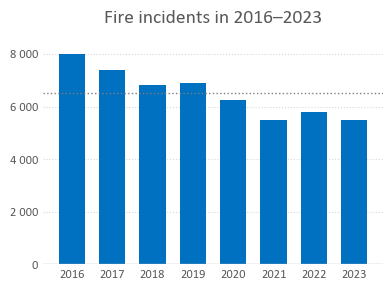

In [224]:
incident_counts = df_analysis['Year'].value_counts()

plt.figure(figsize=(4, 3))
plt.title('Fire incidents in 2016–2023', pad=15)
plt.bar(incident_counts.index, incident_counts.values, color='#0070C0', width=0.65)

plt.tight_layout()

plt.gca().yaxis.set_major_formatter(FuncFormatter(space_formatter))  # Apply to y-axis

plt.axhline(y=0, color='#BFBFBF', linewidth=1)  # Add a horizontal line on the x-axis
plt.axhline(y=np.mean(incident_counts.values), color='#7F7F7F', linewidth=1, linestyle = ':')  # Add a horizontal line on the x-axis

plt.show()

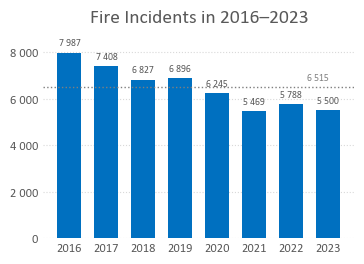

In [246]:
# Example data (replace this with your actual `incident_counts`)
incident_counts = {'2016': 7987, '2017': 7408, '2018': 6827, '2019': 6896, '2020': 6245, '2021': 5469, '2022': 5788, '2023': 5500}
incident_counts = dict(sorted(incident_counts.items()))
keys = list(incident_counts.keys())
values = list(incident_counts.values())

# Calculate average
average_value = np.mean(values)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)  # Manageable size
ax.bar(keys, values, color='#0070C0', width=0.65)

# Title and labels
ax.set_title('Fire Incidents in 2016–2023', pad=15)


# Add value labels above each bar
for i, value in enumerate(values):
    ax.text(
        i, value + 200,  # Adjust position slightly above the bar
        f'{value:,}'.replace(',', ' '),  # Formatted label
        ha='center', va='bottom', fontsize=7, color='#595959'
    )

# Add a horizontal line for the average
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
ax.text(
    len(keys) - 1,  # Near the last bar
    average_value + 200,  # Above the average line
    f'{int(average_value):,}'.replace(',', ' '),
    ha='right', va='bottom', fontsize=7, color='#7F7F7F'
)

# Format y-axis with spaces
ax.yaxis.set_major_formatter(FuncFormatter(space_formatter))

# Tidy layout
plt.tight_layout(pad=2.0)  # Add padding to avoid overlaps
plt.show()


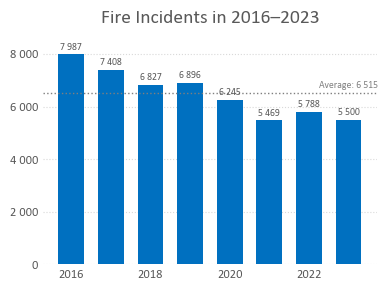

In [252]:
# Example data (replace this with your actual `incident_counts`)
incident_counts = df_analysis['Year'].value_counts().sort_index()  # Count and sort by year
incident_counts = incident_counts.to_dict()  # Convert to dictionary
keys = list(incident_counts.keys())  # Ensure keys are sorted years
values = list(incident_counts.values())

# Calculate average
average_value = np.mean(values)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))#, dpi=100)  # Manageable size
bars = ax.bar(keys, values, color='#0070C0', width=0.65) 

# Title and labels
ax.set_title('Fire Incidents in 2016–2023', pad=15)

# Add value labels above each bar
for bar, value in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 100,  # Y position (slightly above the bar)
        f'{value:,}'.replace(',', ' '),  # Formatted label
        ha='center', va='bottom', fontsize=7, color='#595959'
    )

# Add a horizontal line for the average
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
ax.text(
    keys[-1],  # Position near the last bar
    average_value + 100,  # Slightly above the average line
    f'Average: {int(average_value):,}'.replace(',', ' '),
    ha='center', va='bottom', fontsize=7, color='#7F7F7F'
)

# Format y-axis with spaces
ax.yaxis.set_major_formatter(FuncFormatter(space_formatter))

# Tidy layout
plt.tight_layout() #(pad=2.0)  # Add padding to avoid overlaps
plt.show()


In [217]:
## ***************************************************************************
## * FONT                                                                    *
## ***************************************************************************
plt.rcParams['font.family'] = 'Calibri'


## ***************************************************************************
## * AXES                                                                    *
## ***************************************************************************
plt.rcParams['axes.edgecolor'] = 'none'  # Disable axes borders globally
plt.rcParams['axes.grid'] = True  # Add grid lines
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.titlesize'] = 14  # Title font size
plt.rcParams['axes.titlecolor'] = '#595959'  # Title font color
plt.rcParams['axes.titleweight'] = 'normal'  # Title font weight
plt.rcParams['axes.labelsize'] = 10  # Font size of the x and y labels
plt.rcParams['axes.labelpad'] = 7.0  # Space between label and axis
plt.rcParams['axes.labelcolor'] = '#595959'  # Font color of the x and y labels
plt.rcParams['axes.axisbelow'] = True  # Ensure gridlines are below the graph elements
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5'])  # Power BI colors


## ***************************************************************************
## * TICKS                                                                   *
## ***************************************************************************
plt.rcParams['xtick.major.size'] = 0  # Major x-axis tick length
plt.rcParams['xtick.minor.size'] = 10  # Minor x-axis tick length
plt.rcParams['xtick.color'] = '#595959'  # X-axis tick label color
plt.rcParams['xtick.labelcolor'] = '#595959'
plt.rcParams['xtick.labelsize'] = 9  # X-axis tick font size

plt.rcParams['ytick.major.size'] = 0  # Major y-axis tick length
plt.rcParams['ytick.minor.size'] = 0  # Minor y-axis tick length
plt.rcParams['ytick.color'] = '#595959'  # Y-axis tick label color
plt.rcParams['ytick.labelcolor'] = '#595959'
plt.rcParams['ytick.labelsize'] = 9  # Y-axis tick font size


## ***************************************************************************
## * GRIDS                                                                   *
## ***************************************************************************
plt.rcParams['grid.color'] = '#D9D9D9'  # Grid line color
plt.rcParams['grid.linestyle'] = ':'  # Dashed grid lines
plt.rcParams['grid.linewidth'] = 0.8  # in points
plt.rcParams['grid.alpha'] = 1.0  # # transparency, between 0.0 and 1.0

In [141]:
from matplotlib.ticker import FuncFormatter
def space_formatter(x, pos):
    return f'{int(x):,}'.replace(',', ' ')  # Format with spaces